             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

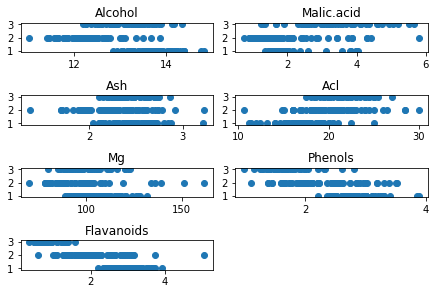

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
#from plot import plot_it
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

df = pd.read_csv("data/wine.csv", header=0)
print (df.describe())

for i in range (1,8):
    number = 420 + i
    ax1 = plt.subplot(number)
    ax1.locator_params(nbins=3)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]],df['Wine']) #Plot a scatter draw of the  datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [2]:
#mnist = input_data.read_data_sets(".", one_hot=True)

X = df[df.columns[1:14]].values
y = df['Wine'].values-1
with tf.Session() as sess:
    Y = tf.one_hot(indices = y, depth=3, on_value = 1., off_value = 0., axis = 1 , name = "a").eval()
    #print(Y)
X, Y = shuffle (X, Y)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [13]:
# add_layer
def add_layer(inputs, in_size, out_size, layer_name, activation_function=None, ):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, )
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # dropout---消除过拟合
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b, )
    tf.summary.histogram(layer_name + '/outputs', outputs)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy)#, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result,correct_prediction

# 定义网络输入的占位符
keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 13])
ys = tf.placeholder(tf.float32, [None, 3])

# 添加输出图层
l1 = add_layer(xs, 13, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 3, 'l2', activation_function=tf.nn.softmax)

# 损失函数---loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
tf.summary.scalar('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


merged = tf.summary.merge_all()


In [16]:
# summary
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer = tf.summary.FileWriter("logs/test", sess.graph)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
A = []
I = []
for i in range(1000):
    # 训练
    sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: .5})
    if i % 50 == 0:
        # 查看loss
        #train_result = sess.run(merged, feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
        #test_result = sess.run(merged, feed_dict={xs: X_test, ys: y_test, keep_prob: 1})
        #train_writer.add_summary(train_result, i)
        #test_writer.add_summary(test_result, i)
        # 输出准确率
        compute_accuracy_t,correct_prediction_t=compute_accuracy(X_test,y_test)
        print(sess.run(correct_prediction_t))
        print(compute_accuracy_t)
    A.append(compute_accuracy(X_test, y_test))
    I.append(i)
print(A)

[False  True  True False False False  True  True False  True False  True
  True False False False False False False False False  True False  True
 False  True  True False False False  True False False False False False]
0.33333334
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
0.9722222
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
1.0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
1.0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True